<table>
    <tr><td align="right" style="background-color:#ffffff;">
        <img src="../images/logo.jpg" width="20%" align="right">
    </td></tr>
    <tr><td align="right" style="color:#777777;background-color:#ffffff;font-size:12px;">
        Prepared by Abuzer Yakaryilmaz<br>
        Özlem Salehi | July 04, 2019 (updated)
    </td></tr>
    <tr><td align="right" style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;">
        This cell contains some macros. If there is a problem with displaying mathematical formulas, please run this cell to load these macros.
    </td></tr>
</table>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\vhadamardzero}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\vhadamardone}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $

<h2> <font color="blue"> Solution for </font>Entanglement and Superdense Coding</h2>

<a id="task1"></a>
<h3> Task 1</h3>

Verify the correctness of the above protocol.

For each pair of $ (x,y) \in \left\{ (0,0), (0,1), (1,0),(1,1) \right\} $:
<ul>
    <li> Create a quantum curcuit with two qubits: Asja's and Balvis' qubits.</li>
    <li> Both are initially set to $ \ket{0} $.</li>
    <li> Apply h-gate (Hadamard) to the first qubit. </li>
    <li> Apply cx-gate (CNOT) with parameters first-qubit and second-qubit. </li>
</ul>

Assume that they are separated now.

<ul>
    <li> If $ x $ is 1, then apply z-gate to the first qubit. </li>
    <li> If $ y $ is 1, then apply x-gate (NOT) to the first qubit. </li>
</ul>

Assume that Asja sends her qubit to Balvis.

<ul>
    <li> Apply cx-gate (CNOT) with parameters first-qubit and second-qubit.</li>
    <li> Apply h-gate (Hadamard) to the first qubit. </li>
    <li> Measure both qubits, and compare the results with pair $ (x,y) $. </li>
</ul>

<h3> Solution </h3>

In [ ]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

all_pairs = ['00','01','10','11']

for pair in all_pairs:

    # create a quantum curcuit with two qubits: Asja's and Balvis' qubits.
    # both are initially set to |0>.
    qreg = QuantumRegister(2) # quantum register with 2 qubits
    creg = ClassicalRegister(2) # classical register with 2 bits
    mycircuit = QuantumCircuit(qreg,creg) # quantum circuit with quantum and classical registers

    # apply h-gate (Hadamard) to the first qubit.
    mycircuit.h(qreg[0])

    # apply cx-gate (CNOT) with parameters first-qubit and second-qubit.
    mycircuit.cx(qreg[0],qreg[1])

    # they are separated now.

    # if a is 1, then apply z-gate to the first qubit.
    if pair[0]=='1': 
        mycircuit.z(qreg[0])
    
    # if b is 1, then apply x-gate (NOT) to the first qubit.
    if pair[1]=='1': 
        mycircuit.x(qreg[0])
    
    # Asja sends her qubit to Balvis.
    
    #  apply cx-gate (CNOT) with parameters first-qubit and second-qubit.
    mycircuit.cx(qreg[0],qreg[1])
    
    # apply h-gate (Hadamard) to the first qubit.
    mycircuit.h(qreg[0])
    
    # measure both qubits
    mycircuit.measure(qreg,creg)
    
    # compare the results with pair (a,b)
    job = execute(mycircuit,Aer.get_backend('qasm_simulator'),shots=100)
    counts = job.result().get_counts(mycircuit)
    for outcome in counts:
        reverse_outcome = ''
        for i in outcome:
            reverse_outcome = i + reverse_outcome
        print("(a,b) is",pair,": ",reverse_outcome,"is observed",counts[outcome],"times")


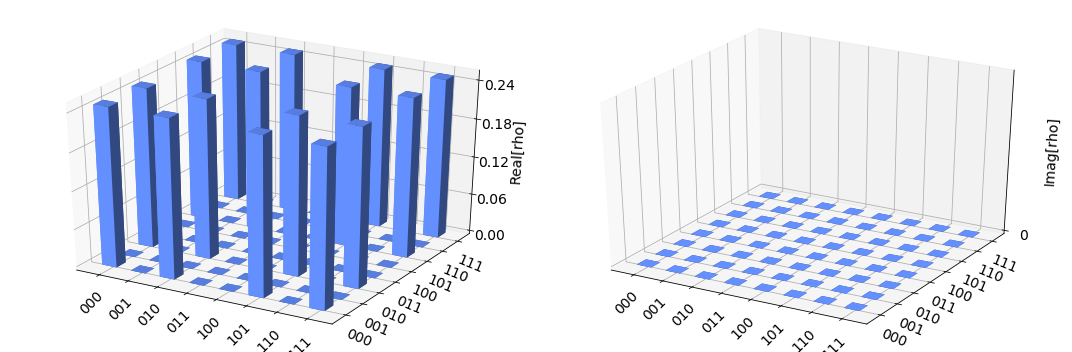

In [6]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
backend = Aer.get_backend('statevector_simulator')

# create a quantum curcuit with two qubits: Asja's and Balvis' qubits.
    # both are initially set to |0>.
qreg = QuantumRegister(3) # quantum register with 2 qubits
creg = ClassicalRegister(3) # classical register with 2 bits
mycircuit = QuantumCircuit(qreg,creg) # quantum circuit with quantum and classical registers

    # apply h-gate (Hadamard) to the first qubit.
mycircuit.h(qreg[0])
mycircuit.h(qreg[1])
    # apply cx-gate (CNOT) with parameters first-qubit and second-qubit.
mycircuit.cx(qreg[0],qreg[1])
mycircuit.cx(qreg[0],qreg[2])

job = execute(mycircuit, backend)
result = job.result()
outputstate = result.get_statevector(mycircuit, decimals=3)

from qiskit.visualization import plot_state_city
plot_state_city(outputstate)